<a href="https://colab.research.google.com/github/dabarreiroh/Patterndsesign/blob/master/PATTERNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Seleccionamos la versión más reciente de tensorflow 2.
try:
    %tensorflow_version 2.x
    %load_ext tensorboard
except Exception:
    pass
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
from pprint import pprint
%matplotlib inline
plt.style.use("ggplot")
# Seleccionamos una semilla para los RNG
tf.random.set_seed(123)
np.random.seed(123)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [9]:
tickets = pd.read_csv('datasetpatterns.csv', sep=',',low_memory=False)

In [10]:
clients=pd.read_csv('clients.csv', sep=',',low_memory=False)

In [11]:
tickets['listregistrant']=tickets.listregistrant.map(lambda x: "REGISTRANTDTP:"+str(x).replace(" ",""))
tickets['listregistrar']=tickets.listregistrar.map(lambda x: "REGISTRARTDTP:"+str(x).replace(" ",""))
tickets['listhosting']=tickets.listhosting.map(lambda x: "HOSTINGDTP:"+str(x).replace(" ",""))
tickets['listcountry']=tickets.listcountry.map(lambda x: "PAISDTP:"+str(x).replace(" ",""))


In [12]:
clients=clients[["'cli_id_client'","'cli_public_id'"]]

In [13]:
tickets=tickets.set_index("'tic_id_client'").join(clients.set_index("'cli_id_client'"))

In [14]:
tickets=tickets[tickets["'tic_ip'"].notna() & tickets['listcountry'].notna() & tickets['listhosting'].notna() &  tickets['listregistrar'].notna() & tickets["'cli_public_id'"].notna()&tickets['listregistrant'].notna()]

In [15]:
tickets.columns

Index(['Unnamed: 0', ''tic_country_attack'', ''tic_domain'', ''tic_ip'',
       ''tic_url'', 'listregistrant', 'listregistrar', 'listhosting',
       'listcountry', ''cli_public_id''],
      dtype='object')

In [16]:
tickets=tickets[["'tic_country_attack'","'tic_domain'","'tic_ip'","'tic_url'",'listregistrant', 'listregistrar',
       'listhosting', 'listcountry',"'cli_public_id'"]]

In [17]:
tickets['simpleurl']=tickets["'tic_url'"].map(lambda x: '/'.join([str(elem) for elem in x.split('//')[-1].split('/')[1:]]) if (x.split('//')[-1].split('/')[1:]!=(['']))and(x.split('//')[-1].split('/')[1:]!=([])) else np.nan)

In [18]:
tickets['simpleurl']=tickets['simpleurl'].map(lambda x: "PATHDTP:"+str(x).replace(" ",""))

In [19]:
tickets=tickets[tickets.simpleurl.notna()]

In [20]:
paths=[]
for element in tickets.simpleurl.to_list():
  try:
    paths=paths+element
  except:
    paths=paths+["xyzxyzxyz"]


Nuestro vocabulario (a nivel de caracter) está conformado de la siguiente forma:

In [21]:
listtype=lambda x: [str(i) for i in x]

In [22]:
tickets=tickets[tickets.simpleurl.notna()]

In [23]:
tickets["'cli_public_id'"]=listtype(tickets["'cli_public_id'"])
tickets["'tic_ip'"]=listtype(tickets["'tic_ip'"])
tickets['simpleurl']=listtype(tickets['simpleurl'])
tickets['listregistrant']=listtype(tickets['listregistrant'])

In [24]:
tickets['text']=tickets[["'cli_public_id'","'tic_ip'",'listregistrant','listregistrar','listhosting','listcountry','simpleurl']].apply(lambda x: ' '.join(x), axis=1)

In [25]:
text=tickets.text.map(lambda x: x.split(' '))

In [26]:
text=text.map(lambda x: [element for element in x if element!=''])

In [27]:
texto=text.sum()

In [28]:
client=tickets["'cli_public_id'"].unique()
ip=tickets["'tic_ip'"].unique()
path=tickets['simpleurl'].unique()
registrant=tickets['listregistrant'].unique()
registrar=tickets['listregistrar'].unique()
hosting=tickets['listhosting'].unique()
country=tickets['listcountry'].unique()

In [29]:
vocabA={client[i]:i for i in range(len(client))}
vocabB={ip[i]:i+len(vocabA) for i in range(len(ip))}
vocabC={path[i]:i+len(vocabA)+len(vocabB) for i in range(len(path))}
vocabD={registrant[i]:i+len(vocabA)+len(vocabB)+len(vocabC) for i in range(len(registrant))}
vocabE={registrar[i]:i+len(vocabA)+len(vocabB)+len(vocabC)+len(vocabD) for i in range(len(registrar))}
vocabF={hosting[i]:i+len(vocabA)+len(vocabB)+len(vocabC)+len(vocabD)+len(vocabE) for i in range(len(hosting))}
vocabG={country[i]:i+len(vocabA)+len(vocabB)+len(vocabC)+len(vocabD)+len(vocabE)+len(vocabF) for i in range(len(country))}

In [30]:
reversevocabA={i:client[i] for i in range(len(client))}
reversevocabB={i+len(reversevocabA):ip[i] for i in range(len(ip))}
reversevocabC={i+len(reversevocabA)+len(reversevocabB):path[i] for i in range(len(path))}
reversevocabD={i+len(reversevocabA)+len(reversevocabB)+len(reversevocabC):registrant[i] for i in range(len(registrant))}
reversevocabE={i+len(reversevocabA)+len(reversevocabB)+len(reversevocabC)+len(reversevocabD):registrar[i] for i in range(len(registrar))}
reversevocabF={i+len(reversevocabA)+len(reversevocabB)+len(reversevocabC)+len(reversevocabD)+len(reversevocabE):hosting[i] for i in range(len(hosting))}
reversevocabG={i+len(reversevocabA)+len(reversevocabB)+len(reversevocabC)+len(reversevocabD)+len(reversevocabE)+len(reversevocabF):country[i] for i in range(len(country))}

In [31]:
vocab=vocabA
vocab.update(vocabB)
vocab.update(vocabC)
vocab.update(vocabD)
vocab.update(vocabE)
vocab.update(vocabF)
vocab.update(vocabG)

In [32]:
reversevocab=reversevocabA
reversevocab.update(reversevocabB)
reversevocab.update(reversevocabC)
reversevocab.update(reversevocabD)
reversevocab.update(reversevocabE)
reversevocab.update(reversevocabF)
reversevocab.update(reversevocabG)


In [33]:
# obtenemos los carácteres únicos en el texto
vocab_size = len(vocab)
print(f'Se encontraron {vocab_size} carácteres únicos')


Se encontraron 83292 carácteres únicos


In [34]:
# LUT para convertir de caracter a entero
char2idx = {i:u for u, i in enumerate(vocab)}

# mostramos la codificación de los primeros 20 carácteres
print('{')
for char,_ in zip(char2idx, range(20)):
    print(f'  {repr(char):4s}: {char2idx[char]:3d}')
print('  ...\n}')

{
  'BBHD':   0
  'EASYSOL':   1
  'BODD':   2
  'BanEstadoChile':   3
  'BanReservas':   4
  'BPOD':   5
  'BCOPICHI':   6
  'BANG':   7
  'BBGN':   8
  'BGRECU':   9
  'BPACIF':  10
  'BCOOME':  11
  'COPFAV':  12
  'PICHINCHA-COL':  13
  'PRDUBANK':  14
  'BAFIRM':  15
  'BINTCH':  16
  'BANGAB':  17
  'FALACL':  18
  'FALAPE':  19
  ...
}


In [35]:
newlist = list()
for i in vocab.keys():
    newlist.append(i)

In [36]:
# LUT para convertir de entero a string
idx2char = np.array(newlist)
len(idx2char)

83292

In [37]:
# convertimos todo el texto a enteros:
text_as_int=[]
for c in texto:
  try:
    text_as_int.append(vocab[c])
  except Exception as e:
    pass

In [38]:
text_as_int=np.array(text_as_int)

In [39]:
print(f"Carácteres originales:\n\t{repr(texto[10:30])}")
print(f"Codificación:\n\t{text_as_int[10:30]}")

Carácteres originales:
	['REGISTRARTDTP:GoDaddy.com,LLC', 'HOSTINGDTP:HGBLOCK-4', 'PAISDTP:UK', 'PATHDTP:wp-content/bhd/bhd2/', 'BBHD', '199.188.200.225', 'REGISTRANTDTP:nan', 'REGISTRARTDTP:nan', 'HOSTINGDTP:NCNET-1', 'PAISDTP:nan', 'PATHDTP:nan', 'BBHD', '35.173.211.168', 'REGISTRANTDTP:LegalDepartment', 'REGISTRARTDTP:MarkMonitor,Inc.', 'HOSTINGDTP:AT-88-Z', 'PAISDTP:US', 'PATHDTP:login/index.php', 'BBHD', '198.54.125.95']
Codificación:
	[80357 80918 83016 31822     0   240 68578 80358 80919 83017 31823     0
   241 68579 80359 80920 83018 31824     0   242]


In [40]:
# definimos la longitud de cada secuencia
seq_length = 6
# definimos el número de ejemplos que verá la red en cada época
examples_per_epoch = len(texto) // (seq_length + 1)
# creamos un dataset con la representación vectorizada
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
# mostramos un ejemplo con un batch de tamaño 10
for i in char_dataset.take(7):
    print(idx2char[i])

BBHD
63.250.38.253
REGISTRANTDTP:WhoisGuardProtected
REGISTRARTDTP:NAMECHEAPINC
HOSTINGDTP:NAMEC-4
PAISDTP:PA
PATHDTP:https/_/_/bhdleon.com.do/azul/wps/portal/BHD/Inicio/!ut/p/z1/


Utilizamos el método ```batch``` para convertir las secuencias al tamaño que deseamos

In [41]:
# obtenemos las secuencias de tamaño 100 + 1
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
# mostramos las primeras 5 secuencias
for item in sequences.take(10):
    print(repr(' '.join(idx2char[item.numpy()])))

'BBHD 63.250.38.253 REGISTRANTDTP:WhoisGuardProtected REGISTRARTDTP:NAMECHEAPINC HOSTINGDTP:NAMEC-4 PAISDTP:PA PATHDTP:https/_/_/bhdleon.com.do/azul/wps/portal/BHD/Inicio/!ut/p/z1/'
'BBHD 108.167.140.148 REGISTRANTDTP:nan REGISTRARTDTP:GoDaddy.com,LLC HOSTINGDTP:HGBLOCK-4 PAISDTP:UK PATHDTP:wp-content/bhd/bhd2/'
'BBHD 199.188.200.225 REGISTRANTDTP:nan REGISTRARTDTP:nan HOSTINGDTP:NCNET-1 PAISDTP:nan PATHDTP:nan'
'BBHD 35.173.211.168 REGISTRANTDTP:LegalDepartment REGISTRARTDTP:MarkMonitor,Inc. HOSTINGDTP:AT-88-Z PAISDTP:US PATHDTP:login/index.php'
'BBHD 198.54.125.95 REGISTRANTDTP:WhoisGuardProtected REGISTRARTDTP:NAMECHEAPINC HOSTINGDTP:NAMEC-4 PAISDTP:PA PATHDTP:DO/COVID-19/wps/portal/BHD/Inicio/!ut/p/z1/'
'BBHD 5.101.152.163 REGISTRANTDTP:nan REGISTRARTDTP:nan HOSTINGDTP:RIPE-5 PAISDTP:nan PATHDTP:BHD/bhd/wps/portal/BHD/Inicio/!ut/p/z1/04_Sj9CPykssy0xPLMnMz0vMAfIjo8ziTSxdDDxNTAy93T3/dz/d5/L2dBISEvZ0FBIS9nQSEh/'
'BBHD 51.83.110.181 REGISTRANTDTP:nan REGISTRARTDTP:nan HOSTINGDTP:RIPE-E

In [42]:
# creamos una función para separar el último caracter
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

# aplicamos la función a todo el dataset original
dataset = sequences.map(split_input_target)

In [43]:
for entrada, salida in dataset.take(10):
    print("Entrada:")
    print(repr(''.join(idx2char[entrada.numpy()])))
    print("Salida:")
    print(repr(''.join(idx2char[salida.numpy()])))

Entrada:
'BBHD63.250.38.253REGISTRANTDTP:WhoisGuardProtectedREGISTRARTDTP:NAMECHEAPINCHOSTINGDTP:NAMEC-4PAISDTP:PA'
Salida:
'63.250.38.253REGISTRANTDTP:WhoisGuardProtectedREGISTRARTDTP:NAMECHEAPINCHOSTINGDTP:NAMEC-4PAISDTP:PAPATHDTP:https/_/_/bhdleon.com.do/azul/wps/portal/BHD/Inicio/!ut/p/z1/'
Entrada:
'BBHD108.167.140.148REGISTRANTDTP:nanREGISTRARTDTP:GoDaddy.com,LLCHOSTINGDTP:HGBLOCK-4PAISDTP:UK'
Salida:
'108.167.140.148REGISTRANTDTP:nanREGISTRARTDTP:GoDaddy.com,LLCHOSTINGDTP:HGBLOCK-4PAISDTP:UKPATHDTP:wp-content/bhd/bhd2/'
Entrada:
'BBHD199.188.200.225REGISTRANTDTP:nanREGISTRARTDTP:nanHOSTINGDTP:NCNET-1PAISDTP:nan'
Salida:
'199.188.200.225REGISTRANTDTP:nanREGISTRARTDTP:nanHOSTINGDTP:NCNET-1PAISDTP:nanPATHDTP:nan'
Entrada:
'BBHD35.173.211.168REGISTRANTDTP:LegalDepartmentREGISTRARTDTP:MarkMonitor,Inc.HOSTINGDTP:AT-88-ZPAISDTP:US'
Salida:
'35.173.211.168REGISTRANTDTP:LegalDepartmentREGISTRARTDTP:MarkMonitor,Inc.HOSTINGDTP:AT-88-ZPAISDTP:USPATHDTP:login/index.php'
Entrada:
'BBHD198.54.

Ahora, especificamos el número de batches que usaremos para entrenar la red y un tamaño de buffer, el cual es neceario para aleatorizar localmente las observaciones (```tf.data``` carga este número de muestras en memoria para poder aleatorizar el entrenamiento).

In [44]:
batch_size = 64
buffer_size = 10000

# creamos el dataset con el batch size y el buffer
dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
dataset

<BatchDataset shapes: ((64, 6), (64, 6)), types: (tf.int64, tf.int64)>

In [45]:
dataset.take(10)

<TakeDataset shapes: ((64, 6), (64, 6)), types: (tf.int64, tf.int64)>

In [46]:
dataset

<BatchDataset shapes: ((64, 6), (64, 6)), types: (tf.int64, tf.int64)>

In [47]:
idx2char[77760]

'REGISTRANTDTP:saikema'

## 4. SimpleRNN



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           21322752  
_________________________________________________________________
simple_rnn (SimpleRNN)       (64, None, 1024)          1311744   
_________________________________________________________________
dense (Dense)                (64, None, 83292)         85374300  
Total params: 108,008,796
Trainable params: 108,008,796
Non-trainable params: 0
_________________________________________________________________


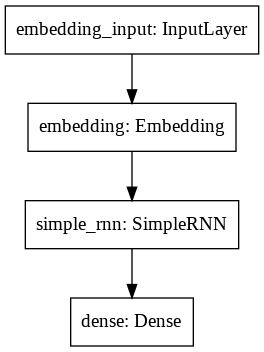

In [48]:
# dimensión del embedding
embedding_dim = 256
# número de únidades en la capa recurrente
rnn_units = 1024

model_srnn = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                            batch_input_shape=[batch_size, None]),
                                  tf.keras.layers.SimpleRNN(rnn_units,
                                                            return_sequences=True, #este argumento hace que el modelo sea many-to-many
                                                            stateful=True,
                                                            recurrent_initializer='glorot_uniform'),
                                  tf.keras.layers.Dense(vocab_size)])
model_srnn.summary()
tf.keras.utils.plot_model(model_srnn)

In [49]:
# obtenemos la predicción para el primer batch
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model_srnn(input_example_batch)
# seleccionamos la secuencia deseada
example_pred_seq = example_batch_predictions[0]
print(f"Tamaño de la secuencia de entrada {input_example_batch[0].shape}")
print(f"Tamaño de la secuencia de salida predicha {example_pred_seq.shape}")
print(f"Tamaño de la secuencia de salida target {target_example_batch[0].shape}")


Tamaño de la secuencia de entrada (6,)
Tamaño de la secuencia de salida predicha (6, 83292)
Tamaño de la secuencia de salida target (6,)


Podemos ver que la predicción para una secuencia de tamaño 100 (códificación en enteros) es una secuencia de tamaño 100 (one-hot). Veamos la distribución del carácter sucesor:

In [50]:
#print("Entrada: \n", repr("".join(idx2char[input_example_batch[0]])))
#
#plt.figure(figsize=(20,10))
#plt.subplot(211)
#plt.bar([repr(i) for i in idx2char], example_pred_seq[-1])
#plt.xlim([0, 88])
#plt.title("Logits")
#plt.subplot(212)
#plt.bar([repr(i) for i in idx2char], tf.nn.softmax(example_pred_seq[-1]))
#plt.xlim([0, 88])
#plt.title("Probits")

### Entrenamiento



In [51]:
examples_per_epoch

65273

In [52]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [53]:
model_srnn.compile(optimizer='adam', loss=loss)

In [54]:
# Utilice el siguiente código si desea entrenar el modelo (puede tomar tiempo)

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath="srnn.h5",
    save_weights_only=True)
#model_srnn.fit(dataset.repeat(), epochs=20, callbacks=[checkpoint_callback],
#               steps_per_epoch=(examples_per_epoch//batch_size))


In [55]:
#
# cargamos los pesos del modelo
model_srnn.load_weights("srnn.h5")

OSError: ignored

In [ ]:
# obtenemos la predicción para el primer batch
#example_batch_predictions = model_srnn(input_example_batch)
# seleccionamos la secuencia deseada
#example_pred_seq = example_batch_predictions[0]

#print("Entrada: \n", repr("".join(idx2char[input_example_batch[0]])))
#print(f"Carácter sucesor más probable: {idx2char[np.argmax(example_pred_seq[-1])]}")
#plt.figure(figsize=(20,10))
#plt.subplot(211)
#plt.bar([repr(i) for i in idx2char], example_pred_seq[-1])
#plt.xlim([0, 88])
#plt.title("Logits")
#plt.subplot(212)
#plt.bar([repr(i) for i in idx2char], tf.nn.softmax(example_pred_seq[-1]))
#plt.xlim([0, 88])
#plt.title("Probits"#)

## Long short-term memory



In [ ]:
# dimensión del embedding
embedding_dim = 256
# número de únidades en la capa recurrente
rnn_units = 1024

model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                            batch_input_shape=[batch_size, None]),
                                  tf.keras.layers.LSTM(rnn_units,
                                                       return_sequences=True, #este argumento hace que el modelo sea many-to-many
                                                       stateful=True,
                                                       recurrent_initializer='glorot_uniform'),
                                  tf.keras.layers.Dense(vocab_size)])
model_lstm.summary()
tf.keras.utils.plot_model(model_lstm)

Veamos las distribuciones predichas por el modelo (pesos aleatorios):

In [ ]:
# obtenemos la predicción para el primer batch
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model_lstm(input_example_batch)
# seleccionamos la secuencia deseada
example_pred_seq = example_batch_predictions[0]
print(f"Tamaño de la secuencia de entrada {input_example_batch[0].shape}")
print(f"Tamaño de la secuencia de salida {example_pred_seq.shape}")

Veamos la distribución del carácter sucesor:

In [ ]:
#print("Entrada: \n", repr("".join(idx2char[input_example_batch[0]])))#
#
#plt.figure(figsize=(20,10))
#plt.subplot(211)
#plt.bar([repr(i) for i in idx2char], example_pred_seq[-1])
#plt.xlim([0, 88])
#plt.title("Logits")
#plt.subplot(212)
#plt.bar([repr(i) for i in idx2char], tf.nn.softmax(example_pred_seq[-1]))
#plt.xlim([0, 88])
#plt.title("Probits")

###  Entrenamiento



In [ ]:
model_lstm.compile(optimizer='adam', loss=loss)

In [ ]:

#checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
#    filepath="lstm.h5",
#    save_weights_only=True)
#model_lstm.fit(dataset.repeat(), epochs=20, callbacks=[checkpoint_callback],
#               steps_per_epoch=examples_per_epoch//batch_size)


In [ ]:
# cargamos los pesos del modelo
model_lstm.load_weights("lstm.h5")

In [ ]:
# obtenemos la predicción para el primer batch
#example_batch_predictions = model_lstm(input_example_batch)
# seleccionamos la secuencia deseada
#example_pred_seq = example_batch_predictions[0]

#print("Entrada: \n", repr("".join(idx2char[input_example_batch[0]])))
#print(f"Carácter sucesor más probable: {idx2char[np.argmax(example_pred_seq[-1])]}")
#plt.figure(figsize=(20,10))
#plt.subplot(211)
#plt.bar([repr(i) for i in idx2char], example_pred_seq[-1])
#plt.xlim([0, 88])
#plt.title("Logits")
#plt.subplot(212)
#plt.bar([repr(i) for i in idx2char], tf.nn.softmax(example_pred_seq[-1]))
#plt.xlim([0, 88])
#plt.title("Probits")

###GRU

In [ ]:
# dimensión del embedding
embedding_dim = 256
# número de únidades en la capa recurrente
rnn_units = 1024

model_gru = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                           batch_input_shape=[batch_size, None]),
                                 tf.keras.layers.GRU(rnn_units,
                                                     return_sequences=True, #este argumento hace que el modelo sea many-to-many
                                                     stateful=True,
                                                     recurrent_initializer='glorot_uniform'),
                                 tf.keras.layers.Dense(vocab_size)])
model_gru.summary()
tf.keras.utils.plot_model(model_gru)

In [ ]:
# obtenemos la predicción para el primer batch
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model_gru(input_example_batch)
# seleccionamos la secuencia deseada
example_pred_seq = example_batch_predictions[0]
print(f"Tamaño de la secuencia de entrada {input_example_batch[0].shape}")
print(f"Tamaño de la secuencia de salida {example_pred_seq.shape}")

In [ ]:
#print("Entrada: \n", repr("".join(idx2char[input_example_batch[0]])))

#plt.figure(figsize=(20,10))
#plt.subplot(211)
#plt.bar([repr(i) for i in idx2char], example_pred_seq[-1])
#plt.xlim([0, 88])
#plt.title("Logits")
#plt.subplot(212)
#plt.bar([repr(i) for i in idx2char], tf.nn.softmax(example_pred_seq[-1]))
#plt.xlim([0, 88])
#plt.title("Probits")

### Entrenamiento



In [ ]:
model_gru.compile(optimizer='adam', loss=loss)

In [ ]:

#checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
#    filepath="gru.h5",
#    save_weights_only=True)
#model_gru.fit(dataset.repeat(), epochs=20, callbacks=[checkpoint_callback],
#              steps_per_epoch=examples_per_epoch//batch_size)


In [ ]:
    # cargamos los pesos del modelo
model_gru.load_weights("gru.h5")

In [ ]:
# obtenemos la predicción para el primer batch
#example_batch_predictions = model_gru(input_example_batch)
# seleccionamos la secuencia deseada
#example_pred_seq = example_batch_predictions[0]

#print("Entrada: \n", repr("".join(idx2char[input_example_batch[0]])))
#print(f"Carácter sucesor más probable: {idx2char[np.argmax(example_pred_seq[-1])]}")
#plt.figure(figsize=(20,10))
#plt.subplot(211)
#plt.bar([repr(i) for i in idx2char], example_pred_seq[-1])
#plt.xlim([0, 88])
#plt.title("Logits")
#plt.subplot(212)
#plt.bar([repr(i) for i in idx2char], tf.nn.softmax(example_pred_seq[-1]))
#plt.xlim([0, 88])
#plt.title("Probits")

In [ ]:
# Función que calcula la probabilidad de un Texto de acuerdo a la fórmula dada anteriormente:
def log_likelihood(model, text):
    res = []
    for i,char in enumerate(" ".split(text)[:-1]):
        # creamos un batch de ceros de secuencias de tamaño 1
        text_int = np.zeros((64,1))
        # asignamos la codificación del caracter
        text_int[0] = char2idx[char]
        # obtenemos la distribución del carácter sucesor
        probs = tf.nn.softmax(model.predict(text_int, batch_size=64)[0,-1])
        # calculamos el log-likelihood del siguiente caracter
        res.append(probs[char2idx[text[i+1]]].numpy())
    return np.log(res).sum()

In [ ]:
log_likelihood(model_srnn,"BBHD 198.54.125.95 REGISTRANTDTP:WhoisGuardProtected REGISTRARTDTP:NAMECHEAPINC HOSTINGDTP:NAMEC-4 PAISDTP:PA")

Ahora, veamos el texto generado con cada uno de los modelos entrenados:

* **SimpleRNN**:

Comenzamos generando texto con un valor de temperatura bajo:

In [ ]:
def generate_text(model, start_string, text_len=np.random.randint(10), temperature=0.3):
    
    # vectorizamos el string inicial
    start_string=start_string.split(' ')
    #start_string=start_string[0]+start_string[1].replace('',' ')
    #print(start_string)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Lista para guardar los resultados
    text_generated = []

    # Reiniciamos los estados del modelo
    model.reset_states()
    # iteramos para obtener el número de carácteres deseado
    for i in range(text_len):
        # obtenemos las predicciones
        predictions = model(input_eval)
        # removemos el eje de los batch
        predictions = tf.squeeze(predictions, 0)
        print(predictions[:])
        # utilizamos la distribución categorica para obtener el siguiente caracter
        #predictions = predictions / temperature
        
        predicted_id = tf.sigmoid.categorical()
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        #print(predicted_id)
        # predicted_id es el caracter predicho (este será la entrada en la siguiente iteración)
        input_eval = tf.expand_dims([predicted_id], 0)
        # agregamos el string correspondiente al id predicho
        if idx2char[predicted_id]!=[]:
          text_generated.append(idx2char[predicted_id])
        else:
          if i!=0:
            i=i-1
    
        #predicted_id = tf.argmax(tf.nn.softmax(predictions), 1)[-1,0].numpy()
        
    return (text_generated[0])#start_string.split(' ')[0]+' http://'+''.join(start_string.split(' ')[1:]) +'/'+'/'.join(text_generated))

In [ ]:
print(generate_text(model_srnn, start_string=u"BBHD 198.54.125.95 REGISTRANTDTP:WhoisGuardProtected REGISTRARTDTP:NAMECHEAPINC HOSTINGDTP:NAMEC-4 PAISDTP:PA", temperature=0.3))

Ahora, veamos el resultado con un valor de temperatura alto:

In [ ]:
print(generate_text(model_srnn, start_string=u"ADP adp.com : ", temperature=2.0))

Lo ideal es encontrar un valor de temperatura apropiado, es decir, donde el texto generado no sea tan repetitivo o determinístico ni tan aleatorio e incoherente, veamos un ejemplo con un valor apropiado:

In [ ]:
print(generate_text(model_srnn, start_string=u"Dios dijo: ", temperature=0.5))

* **LSTM**:

In [ ]:
# creamos un modelo con un tamaño de batche 1 con los pesos del modelo entrenado
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                            batch_input_shape=[1, None]),
                                  tf.keras.layers.LSTM(rnn_units,
                                                       return_sequences=True, #este argumento hace que el modelo sea many-to-many
                                                       stateful=True,
                                                       recurrent_initializer='glorot_uniform'),
                                  tf.keras.layers.Dense(vocab_size)])

model_lstm.load_weights("lstm.h5")

In [ ]:
model_lstm.summary()

In [ ]:
print(generate_text(model_lstm, start_string=u"BBHD 63.250.38.253 REGISTRANTDTP:WhoisGuardProtected REGISTRARTDTP:NAMECHEAPINC HOSTINGDTP:NAMEC-4 PAISDTP:PA"))

In [ ]:
model_lstm.predict([3, 143, 123, 212])

* **GRU**:

In [ ]:
# creamos un modelo con un tamaño de batche 1 con los pesos del modelo entrenado
model_gru = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                            batch_input_shape=[1, None]),
                                 tf.keras.layers.GRU(rnn_units,
                                                     return_sequences=True, #este argumento hace que el modelo sea many-to-many
                                                     stateful=True,
                                                     recurrent_initializer='glorot_uniform'),
                                 tf.keras.layers.Dense(vocab_size)])

model_gru.load_weights("gru.h5")

In [ ]:
model_gru.summary()

In [ ]:
print(generate_text(model_gru, start_string=u"SMBC smbcghy.com"))